# Introduction du projet

- Objectif : Tous les patients sont positifs à la Leucémie.
  On doit prédire si un patient a une leucémie APL ou Non-APl.
  Le traitement est alors différent pour le patient (Sans chimiothérapie pour APL).
    

- Définition de la target : leucémie
Maladie qui se caractérise par la production d'un grand nombre de globules blancs immatures qui, s'ils quittent la moelle osseuse et circulent dans le sang, peuvent envahir tous les organes. On parle parfois de cancer du sang. Il existe plusieurs types de leucémies.

- Un sujet négatif a un label 0. (Non-APL)
- Un sujet positif a un label 1. (APL)

# Importation des librairies 

In [31]:
%autosave 0

## traitement des données 
import pandas as pd
import numpy as np

## visualisation des données 
import seaborn as sns
import matplotlib.pyplot as plt

import sys
sys.path.append('..')
import lib
from lib.data_explore import DataExplore

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Autosave disabled


# Initialisation des données 

In [2]:
init_df = pd.read_excel("../data/Données projet LAP Cas-témoin 02-10-20.xlsx")

In [3]:
## Une copie des données pour éviter de les recharger,
## si on veut plus tard faire des tests différent, ou mauvaise manipulation. 
## (ici peu utile mais si on pense à un gros dataset chargé depuis une bdd, ca peut prendre beaucoup de temps)

df = init_df

In [4]:
## Dimension du dataset (ligne, colonne)
df.shape

(222, 38)

In [5]:
## Du confort pour la découverte, pouvoir au moins voir toutes les colonnes, moins important pour le nombre de lignes.
pd.set_option('display.max_rows', df.shape[0])
pd.set_option('display.max_columns', df.shape[1])

# Découverte du dataset

In [6]:
## information sur la structure des données et des manquants
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Témoin/Cas (0/1)         222 non-null    int64  
 1   Patient numbers          222 non-null    int64  
 2   Age                      222 non-null    float64
 3   Sex M/F (0/1)            222 non-null    int64  
 4   Leucocytes (G/L)         221 non-null    float64
 5   Hematies (T/L)           216 non-null    float64
 6   Hemoglobine (g/L)        221 non-null    float64
 7   Hematocrite (%)          217 non-null    float64
 8   VGM (fL)                 218 non-null    float64
 9   TCMH (pg)                219 non-null    float64
 10  CCMH (g/L)               217 non-null    float64
 11  IDR-CV (%)               216 non-null    float64
 12  PNN (%)                  215 non-null    float64
 13  PNN (G/L)                215 non-null    float64
 14  PNE (%)                  2

In [7]:
## décris la distribution des données
df.describe()

,Témoin/Cas (0/1),Patient numbers,Age,Sex M/F (0/1),Leucocytes (G/L),Hematies (T/L),Hemoglobine (g/L),Hematocrite (%),VGM (fL),TCMH (pg),CCMH (g/L),IDR-CV (%),PNN (%),PNN (G/L),PNE (%),PNE (G/L),PNB (%),PNB (G/L),Lymphos (%),Lymphos (G/L),Mono (%),Mono (G/L),VPM (fL),TP (%),Ratio TCA,LDH (U/L),Calcium (Ca2+) (mmol/L),Phosphore (mmol/L),Uree (mmol/L),Creatinine,Ferritine (ug/L)
count,222.000000,222.000000,222.000000,222.000000,221.000000,216.00000,221.000000,217.000000,218.000000,219.000000,217.000000,216.000000,215.000000,215.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,187.000000,219.000000,220.000000,192.000000,218.000000,199.000000,219.000000,220.000000,139.000000
mean,0.342342,111.500000,55.433481,0.495495,31.513167,2.91500,90.576923,26.911889,93.769725,31.856164,336.689862,16.312963,20.387442,2.898214,0.522066,0.080563,0.085915,0.013662,27.712676,2.746854,6.362911,2.055822,10.544920,72.041096,0.969136,652.276042,2.276560,1.073668,6.092922,82.338182,1504.149640
std,0.475566,64.230055,20.851697,0.501110,59.202539,0.76024,21.881085,6.345447,9.413448,3.229025,32.129871,2.269129,19.216173,5.263600,1.706600,0.283425,0.292821,0.074591,23.356502,3.773560,11.087265,7.080854,1.286954,17.540076,0.154150,842.930398,0.131929,0.254616,3.122023,37.723592,2960.469031
min,0.000000,1.000000,0.000000,0.000000,0.340000,0.81000,9.400000,0.280000,67.800000,21.100000,34.800000,11.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.500000,17.000000,0.640000,82.000000,1.850000,0.490000,1.000000,17.000000,39.000000
25%,0.000000,56.250000,42.077397,0.000000,2.210000,2.37500,75.000000,22.700000,87.425000,29.700000,330.000000,14.600000,4.500000,0.320000,0.000000,0.000000,0.000000,0.000000,8.000000,0.830000,0.000000,0.000000,9.700000,59.500000,0.870000,239.750000,2.200000,0.925000,4.100000,61.000000,363.500000
50%,0.000000,111.500000,58.168493,0.000000,7.680000,2.91500,91.000000,27.000000,93.450000,32.000000,339.000000,15.950000,14.000000,1.060000,0.000000,0.000000,0.000000,0.000000,20.000000,1.630000,2.000000,0.100000,10.400000,71.000000,0.940000,352.500000,2.295000,1.050000,5.500000,76.000000,694.000000
75%,1.000000,166.750000,71.134932,1.000000,34.080000,3.34500,104.000000,31.000000,100.225000,34.050000,349.000000,17.600000,34.000000,2.885000,1.000000,0.020000,0.000000,0.000000,43.000000,2.990000,8.000000,1.170000,11.300000,85.000000,1.030000,687.250000,2.360000,1.250000,7.150000,96.000000,1363.000000
max,1.000000,222.000000,89.980822,1.000000,447.780000,4.89000,141.000000,43.600000,122.200000,42.000000,370.000000,23.400000,83.000000,43.340000,22.200000,2.570000,2.000000,0.830000,92.000000,26.870000,75.000000,79.450000,14.000000,113.000000,1.810000,6877.000000,2.720000,1.920000,23.550000,348.000000,26166.000000


In [8]:
## visualiser les premiére lignes
df.head(5)

,Témoin/Cas (0/1),Patient numbers,Age,Sex M/F (0/1),Leucocytes (G/L),Hematies (T/L),Hemoglobine (g/L),Hematocrite (%),VGM (fL),TCMH (pg),CCMH (g/L),IDR-CV (%),PNN (%),PNN (G/L),PNE (%),PNE (G/L),PNB (%),PNB (G/L),Lymphos (%),Lymphos (G/L),Mono (%),Mono (G/L),Blastes (%),Plq (G/L),VPM (fL),Ret (G/L),TP (%),Ratio TCA,Fibrinogene (g/L),PDF (ug/mL),LDH (U/L),Calcium (Ca2+) (mmol/L),Phosphore (mmol/L),Uree (mmol/L),Creatinine,Acide urique (umol/L),Ferritine (ug/L),CRP (mg/L)
0,0,1,47.227397,0,323.00,NaN,70.0,NaN,NaN,NaN,NaN,NaN,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98,32,NaN,NaN,51.0,1.60,4.2,NaN,2711.0,NaN,NaN,NaN,126.0,776,NaN,38.1
1,0,2,36.463014,1,1.30,2.38,86.0,26.0,107.1,36.1,337.0,17.5,3.0,0.04,0.0,0.0,0.0,0.0,66.0,0.86,0.0,0.00,31,57,11.2,NaN,100.0,0.87,3.86,NaN,227.0,2.49,0.80,3.8,59.0,322,316.0,24
2,0,3,15.306849,0,0.55,3.46,95.0,26.0,74.3,27.5,370.0,12.3,0.0,0.00,0.0,0.0,0.0,0.0,60.0,0.33,4.0,0.02,36,17,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,4,75.115068,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,5,54.876712,1,125.52,2.95,101.0,29.0,97.6,34.2,351.0,15.9,1.0,1.26,0.0,0.0,0.0,0.0,4.0,5.02,0.0,0.00,95,50,11.2,NaN,60.0,0.87,3.89,40,1961.0,2.27,0.99,4.0,64.0,440,1960.0,71.9


In [9]:
## Une fonction qui permet de voir plus clair le nombre de manquants, 
## je l'utliserai à la fin de l'opération de nettoyage pour m'assurer que tout est bien clean.

def countNa(df):
    """Pass your DataFrame, return NA count & % for each column in new df """

    sum_null = df.isnull().sum()
    total = df.isnull().count()
    percent_nullvalues = 100* sum_null / total 
    df_null = pd.DataFrame()
    df_null['Total'] = total
    df_null['Null_Count'] = sum_null
    df_null['Percent'] = round(percent_nullvalues,2)
    df_null = df_null.sort_values(by='Null_Count',ascending = False)
    df_null = df_null[df_null.Null_Count > 0]
    return(df_null)

countNa(df)

,Total,Null_Count,Percent
PDF (ug/mL),222,194,87.39
Ret (G/L),222,108,48.65
Ferritine (ug/L),222,83,37.39
VPM (fL),222,35,15.77
LDH (U/L),222,30,13.51
Phosphore (mmol/L),222,23,10.36
Acide urique (umol/L),222,22,9.91
CRP (mg/L),222,21,9.46
Blastes (%),222,12,5.41
PNE (G/L),222,9,4.05


In [10]:
## Clean des colonnes : renome la target et drop de l'Id, remplacement des espaces par _
## Avoir un peu de confort pour la manipulation et ne pas laisser d'espace ... c'est trés génant, idem pour les /.

df.columns = df.columns.str.replace(" ", "_").str.replace("/","_")
df = df.rename(columns={"Témoin_Cas_(0_1)": "target"})
df = df.drop(columns=["Patient_numbers"])

df.columns

Index(['target', 'Age', 'Sex_M_F_(0_1)', 'Leucocytes_(G_L)', 'Hematies_(T_L)',
       'Hemoglobine_(g_L)', 'Hematocrite_(%)', 'VGM_(fL)', 'TCMH_(pg)',
       'CCMH_(g_L)', 'IDR-CV_(%)', 'PNN_(%)', 'PNN_(G_L)', 'PNE_(%)',
       'PNE_(G_L)', 'PNB_(%)', 'PNB_(G_L)', 'Lymphos_(%)', 'Lymphos_(G_L)',
       'Mono_(%)', 'Mono_(G_L)', 'Blastes_(%)', 'Plq_(G_L)', 'VPM_(fL)',
       'Ret_(G_L)', 'TP_(%)', 'Ratio_TCA_', 'Fibrinogene_(g_L)',
       'PDF_(ug_mL)_', 'LDH_(U_L)', 'Calcium_(Ca2+)_(mmol_L)',
       'Phosphore_(mmol_L)', 'Uree_(mmol_L)', 'Creatinine',
       'Acide_urique_(umol_L)', 'Ferritine_(ug_L)', 'CRP_(mg_L)'],
      dtype='object')

In [11]:
## j'isole les colonnes objet et je regarde leur contenue en remontant plus haut dans la visualisation globale

cols = df.columns[df.dtypes.eq(object)]
cols

Index(['Blastes_(%)', 'Plq_(G_L)', 'Ret_(G_L)', 'Fibrinogene_(g_L)',
       'PDF_(ug_mL)_', 'Acide_urique_(umol_L)', 'CRP_(mg_L)'],
      dtype='object')

In [12]:
## Ces Colonnes sont des floats mais contiennent des symboles >, < , /

In [13]:
## clean des colonnes, 
df = df.replace("<","").replace(">","").replace("/","").replace(" ","_")
## une autre approche peut être testée, car ici je garde la valeur seuil.

In [14]:
## transformation des colonnes objet en float
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

In [15]:
## remplacement des manquants par 0, pour le moment, il y'a d'autres options
## mais on verra si nécessaire lors de la modélisation

df = df.fillna(0)

In [16]:
## je vérifie que l'opération est ok
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   target                   222 non-null    int64  
 1   Age                      222 non-null    float64
 2   Sex_M_F_(0_1)            222 non-null    int64  
 3   Leucocytes_(G_L)         222 non-null    float64
 4   Hematies_(T_L)           222 non-null    float64
 5   Hemoglobine_(g_L)        222 non-null    float64
 6   Hematocrite_(%)          222 non-null    float64
 7   VGM_(fL)                 222 non-null    float64
 8   TCMH_(pg)                222 non-null    float64
 9   CCMH_(g_L)               222 non-null    float64
 10  IDR-CV_(%)               222 non-null    float64
 11  PNN_(%)                  222 non-null    float64
 12  PNN_(G_L)                222 non-null    float64
 13  PNE_(%)                  222 non-null    float64
 14  PNE_(G_L)                2

In [17]:
## je réutilise la fonction countNa afin de m'assurer que tout est bien clean
countNa(df)

,Total,Null_Count,Percent


# Data Visualisation

In [18]:
## Je commence a regarder maintenant un peu en détails les données en utlisant la visualisation

- Focus sur la Target

In [19]:
def target_distribution(df, subject='target'):
    """Pass your DataFrame, the key of subject (target by default), 
    return : show distribution details & vis for subject and return both df if i needed for other operation """

    plt.figure(figsize=(15,5))
    sns.countplot(df[subject])
    plt.show()

    ## je split et isole le df en 2, et les sotcks dans des variables positif/negatif
    panel_positif = df[df[subject].isin([1])]
    panel_negatif = df[df[subject].isin([0])]

    count_pos = panel_positif['target'].count()
    count_neg = panel_negatif['target'].count()
    count_tot = df.shape[0]

    pc_pos = count_pos*100/count_tot
    pc_neg = count_neg*100/count_tot

    print("Nombres de personnes positives : ", count_pos, f" = {round(pc_pos,2)} %")
    print("Nombres de personnes negatives : ", count_neg, f" = {round(pc_neg,2)} %")
    
    return panel_positif, panel_negatif

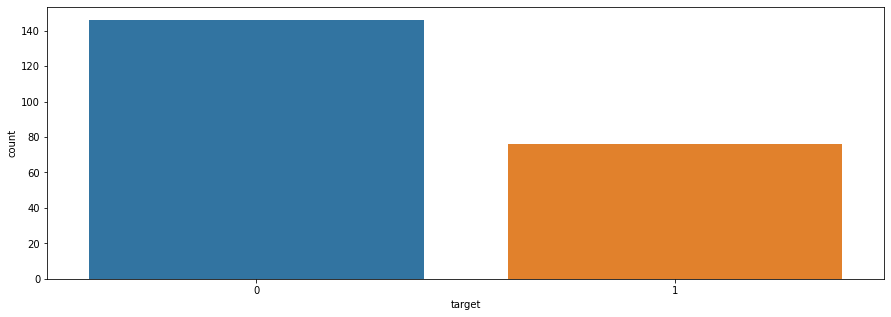

Nombres de personnes positives :  76  = 34.23 %
Nombres de personnes negatives :  146  = 65.77 %


In [20]:
panel_positif_global, panel_negatif_global = target_distribution(df)

- Focus sur la colonne contenant beaucoup de NA

In [21]:
## Je regarde la colonne PDF (ug_mL) avec 87.9 % de na, je separe les non na et des na remplacés par 0

PDF_col_not_na = df[~df["PDF_(ug_mL)_"].isin([0])]
PDF_col_all_na = df[df["PDF_(ug_mL)_"].isin([0])]

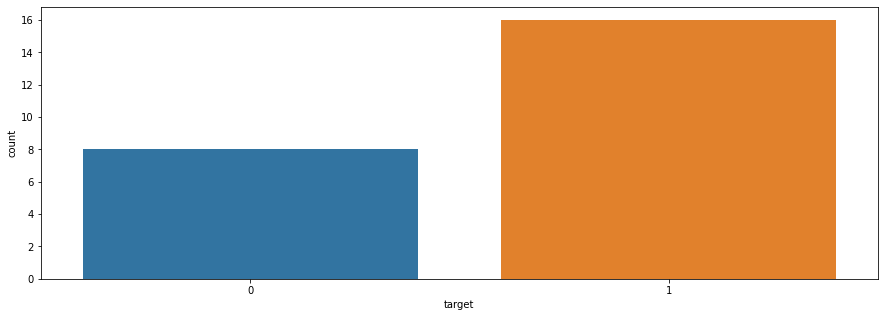

Nombres de personnes positives :  16  = 66.67 %
Nombres de personnes negatives :  8  = 33.33 %


In [22]:
## je regarde la distribution de la target lorsque que la données est présente
df_reset, df_reset2 = target_distribution(PDF_col_not_na)

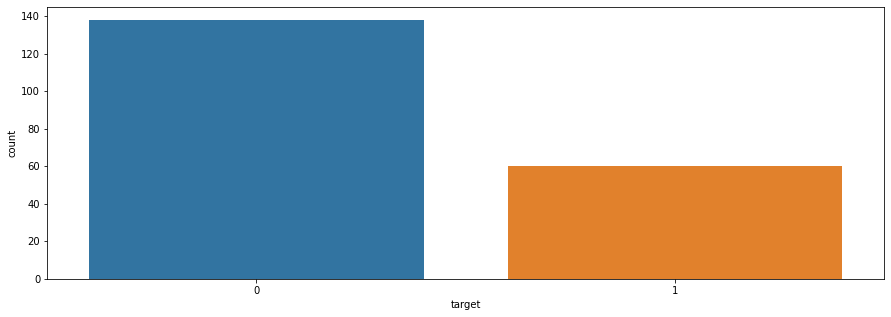

Nombres de personnes positives :  60  = 30.3 %
Nombres de personnes negatives :  138  = 69.7 %


In [23]:
## je regarde la distribution de la target lorsque que la donnée est absente
df_reset, df_reset2 = target_distribution(PDF_col_all_na)

Conclusion concernant cette donnée : 
- On a tendance à supprimer les colonnes avec beaucoup de NA, cependant lorsque qu'elle est présente elle semble apportée des informations pour les positifs, on verra lors de la modélisation si on la conserve ou non, mais dans un premier temps je pars sur l'hypothése que oui. 

- Focus sur la colonne sexe

In [24]:
## Cette colonne est un peu particuliére, on parle plus de boolean et nécessite une visualisation différente des autres
## elle peut parfaitement se faire avec la fonction crée plus haut car dans la même situation que notre target

df_Ho = df[df["Sex_M_F_(0_1)"].isin([0])]
df_Fe = df[df["Sex_M_F_(0_1)"].isin([1])]

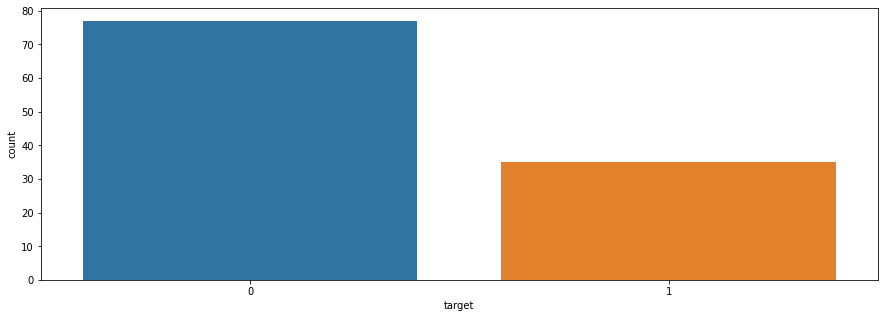

Nombres de personnes positives :  35  = 31.25 %
Nombres de personnes negatives :  77  = 68.75 %


In [25]:
df_reset, df_reset2 = target_distribution(df_Ho)

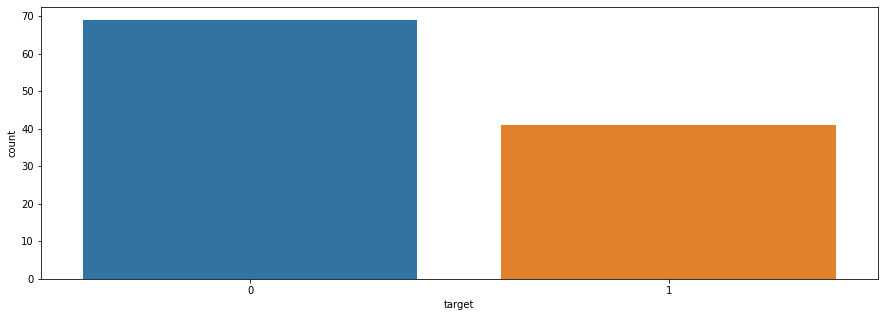

Nombres de personnes positives :  41  = 37.27 %
Nombres de personnes negatives :  69  = 62.73 %


In [26]:
df_reset, df_reset2 = target_distribution(df_Fe)

Conclusion concernant cette donnée : 
    - On reste dans des proportions prochent, pas d'impact particuliers.

In [27]:
## Je sotck le nom de toutes les colonnes restantes dans une variable, ici elles sont toutes numériques, 
## si on avait des categorielles on ferait une autre variable
num_cols_name = df.columns
num_cols_name = num_cols_name.tolist()

## j'enleve la target de la liste et la colonne sexe car déjà vue.
num_cols_name.remove('target') 
num_cols_name.remove('Sex_M_F_(0_1)')
num_cols_name

['Age',
 'Leucocytes_(G_L)',
 'Hematies_(T_L)',
 'Hemoglobine_(g_L)',
 'Hematocrite_(%)',
 'VGM_(fL)',
 'TCMH_(pg)',
 'CCMH_(g_L)',
 'IDR-CV_(%)',
 'PNN_(%)',
 'PNN_(G_L)',
 'PNE_(%)',
 'PNE_(G_L)',
 'PNB_(%)',
 'PNB_(G_L)',
 'Lymphos_(%)',
 'Lymphos_(G_L)',
 'Mono_(%)',
 'Mono_(G_L)',
 'Blastes_(%)',
 'Plq_(G_L)',
 'VPM_(fL)',
 'Ret_(G_L)',
 'TP_(%)',
 'Ratio_TCA_',
 'Fibrinogene_(g_L)',
 'PDF_(ug_mL)_',
 'LDH_(U_L)',
 'Calcium_(Ca2+)_(mmol_L)',
 'Phosphore_(mmol_L)',
 'Uree_(mmol_L)',
 'Creatinine',
 'Acide_urique_(umol_L)',
 'Ferritine_(ug_L)',
 'CRP_(mg_L)']

In [28]:
def all_var_distribution(df, list_num_cols_name):
    """Pass your DataFrame, and list of numerical columns name, 
    return : show distribution details with boxplot """
        
    plt.rcParams.update({'figure.max_open_warning': 0}) ## Care only for jupyter ... 
    
    for col in list_num_cols_name:
        plt.figure(figsize=(15,5))
        ax = sns.boxplot(x="target", y=f"{col}", data=df)
        ax2 = sns.swarmplot(x="target", y=f"{col}", data=df, size=3, color=".25")
        plt.legend(['0 : Negatif','1 : Positif'])
        plt.title(f"Distribution by target for {col} ")
        plt.show

c:\users\nicof\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 16.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\nicof\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 16.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\nicof\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 21.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


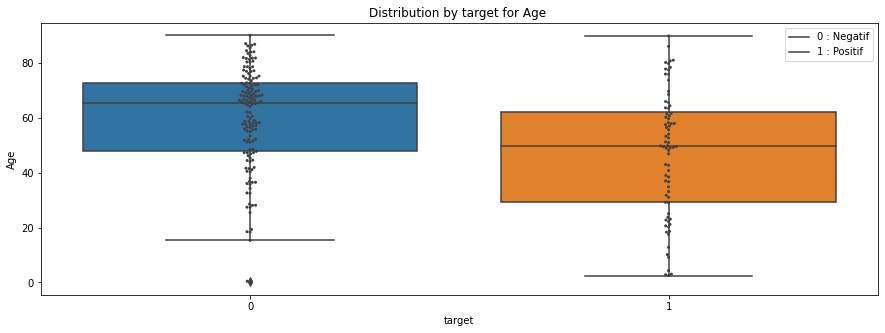

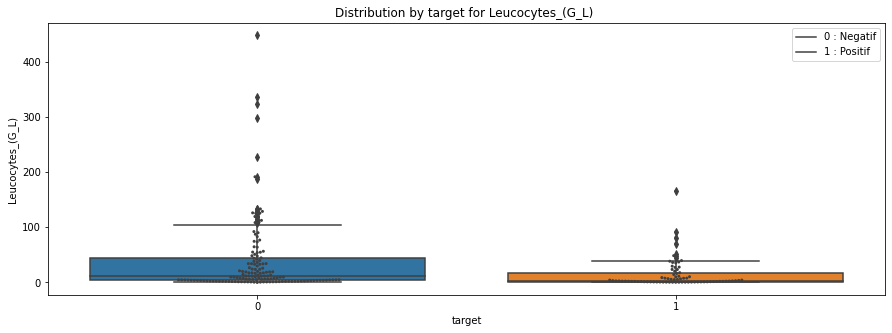

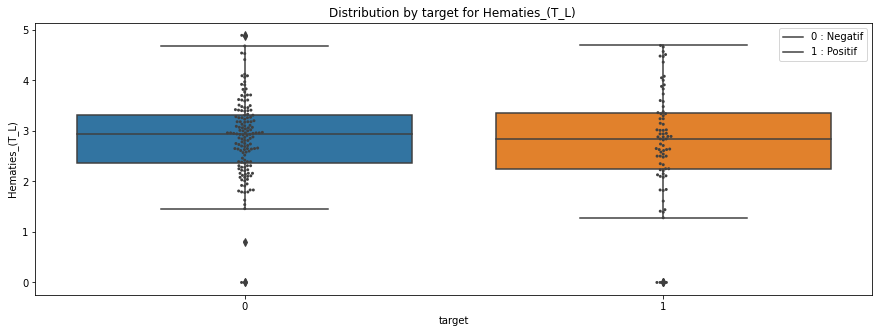

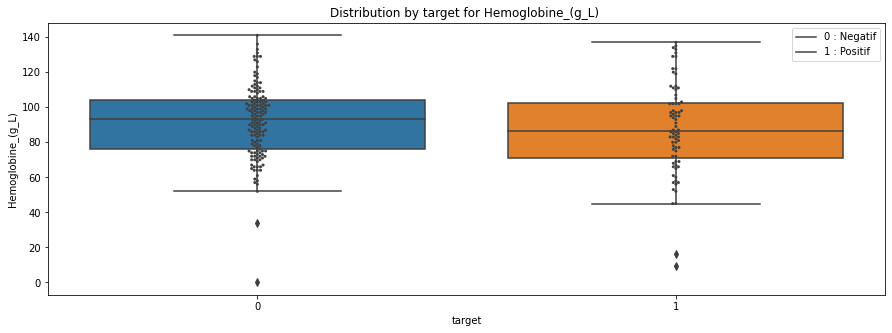

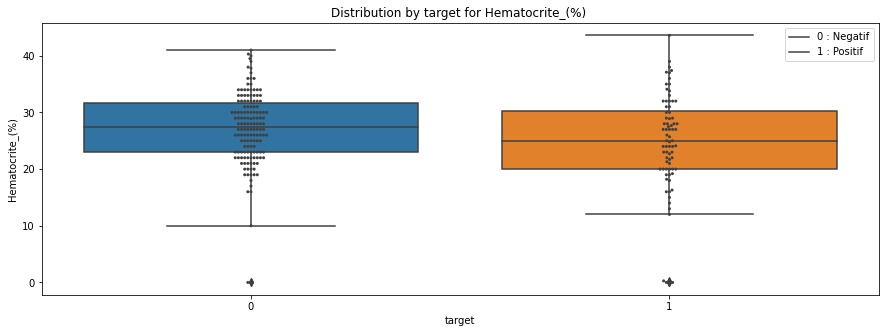

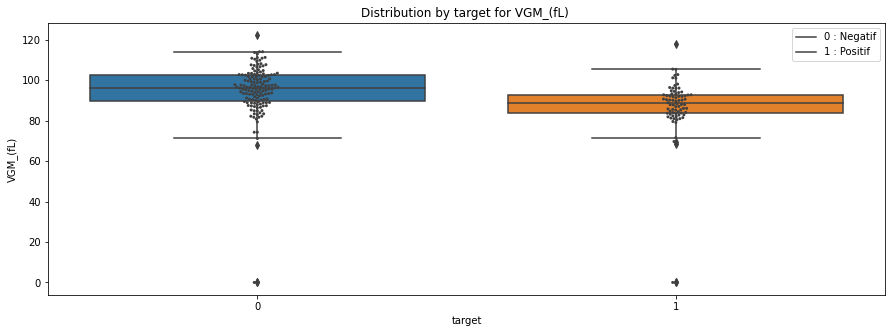

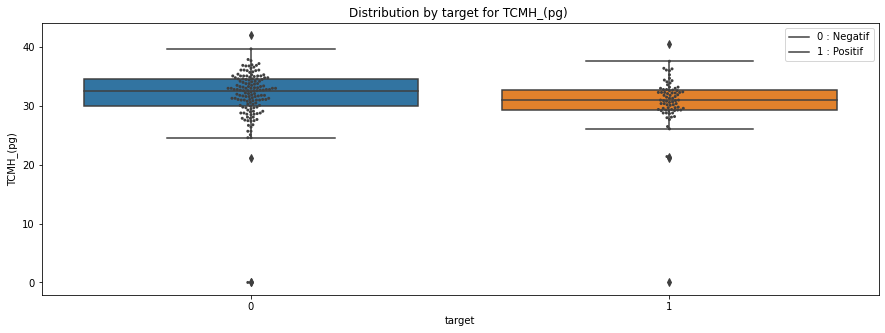

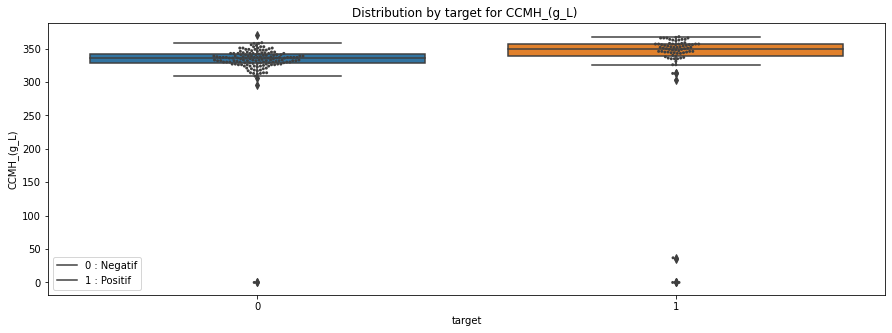

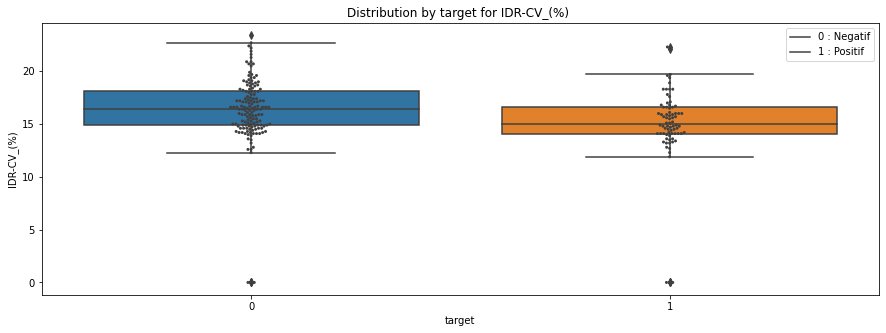

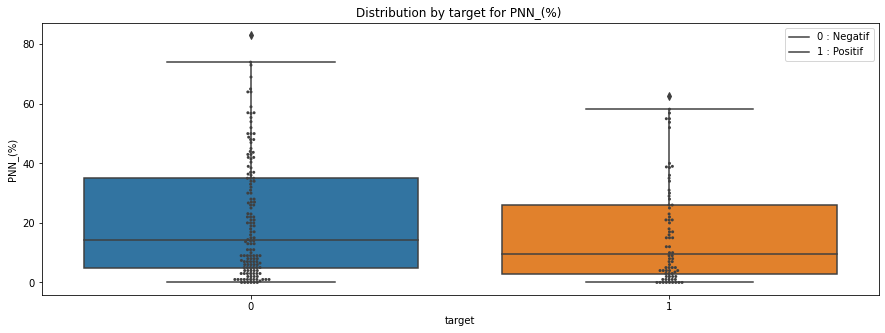

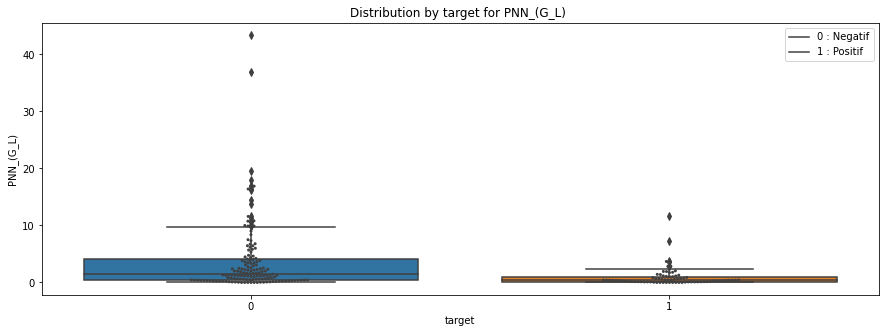

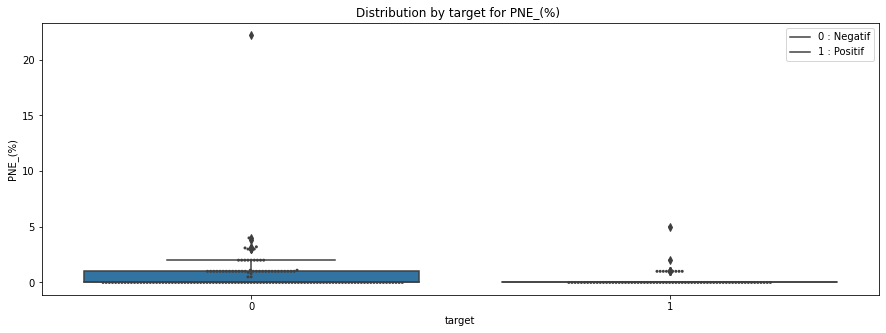

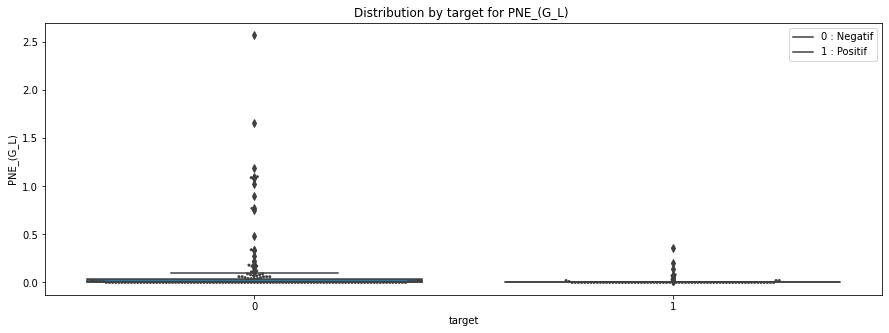

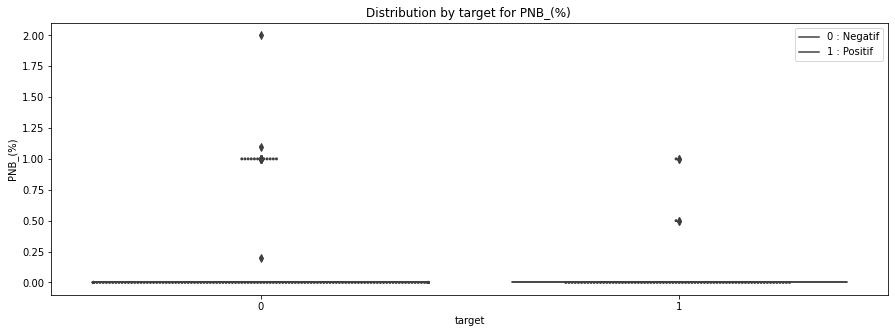

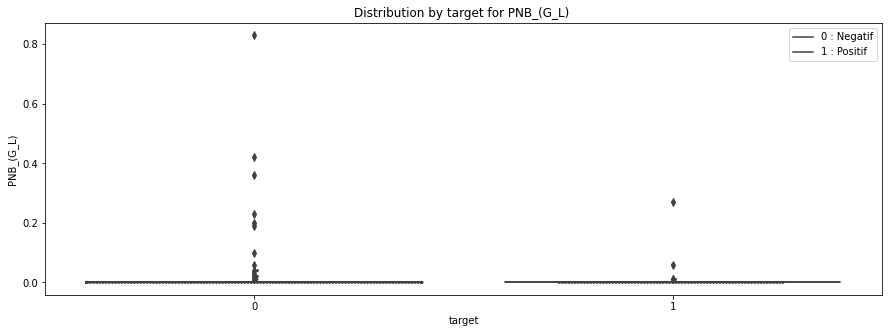

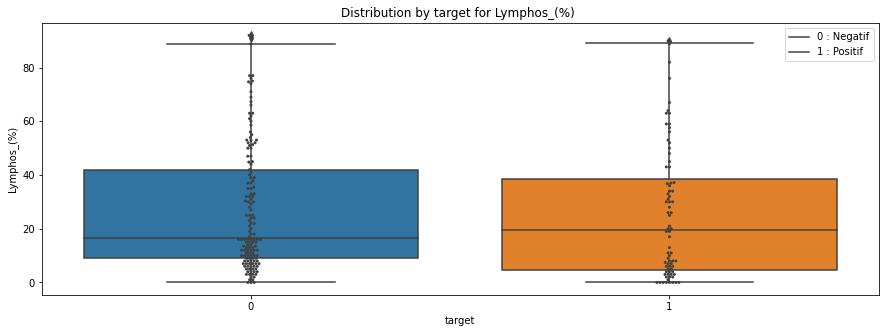

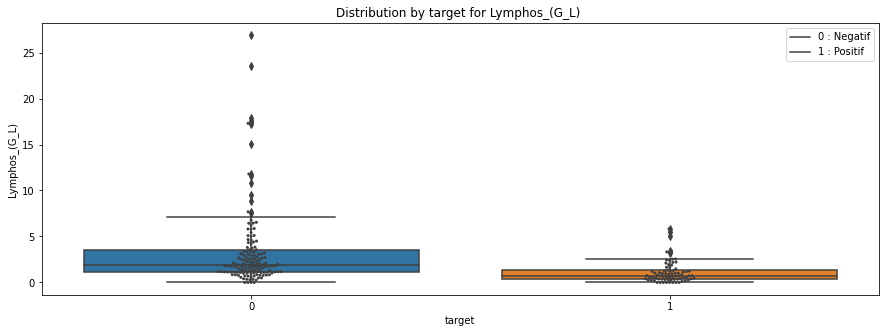

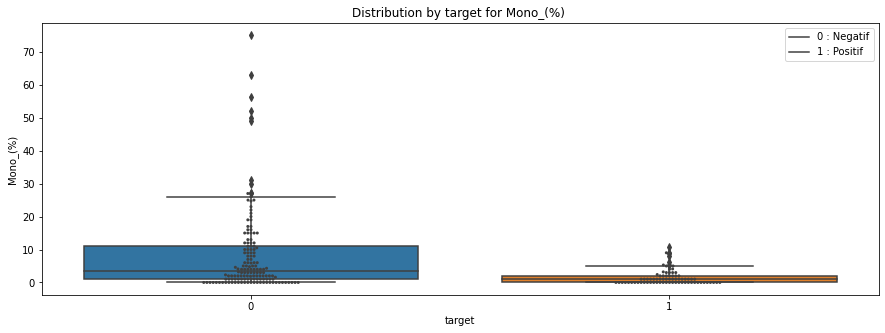

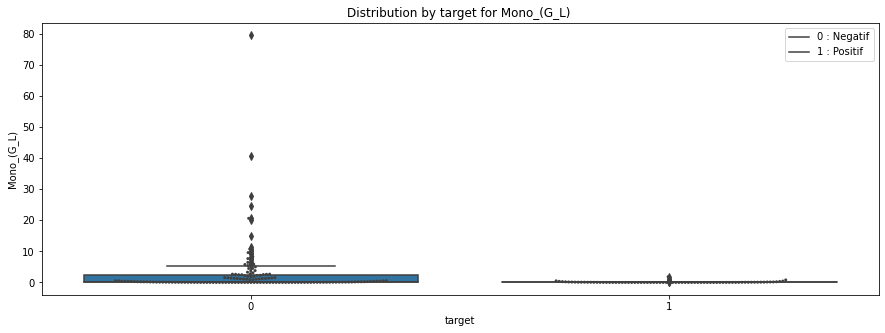

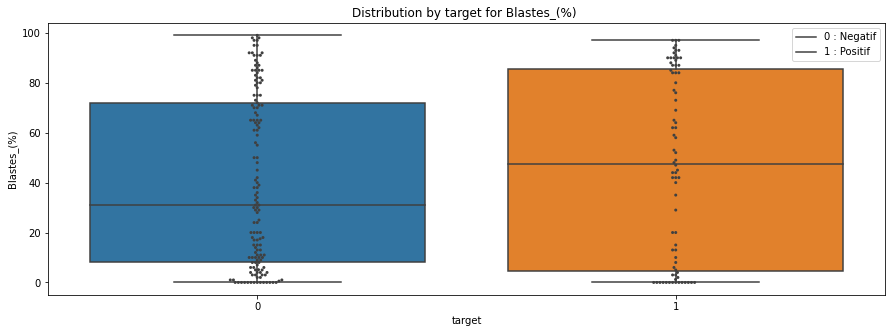

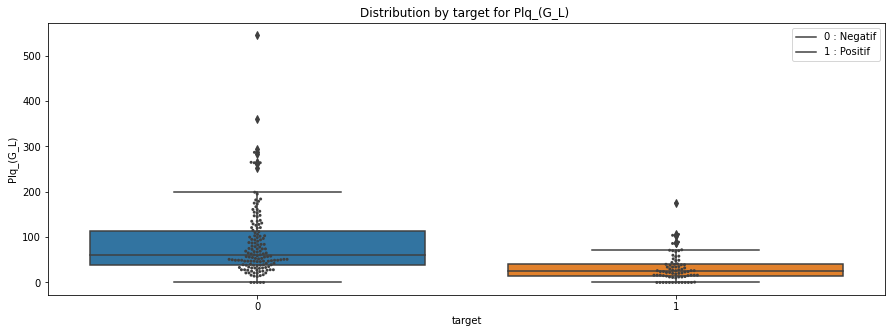

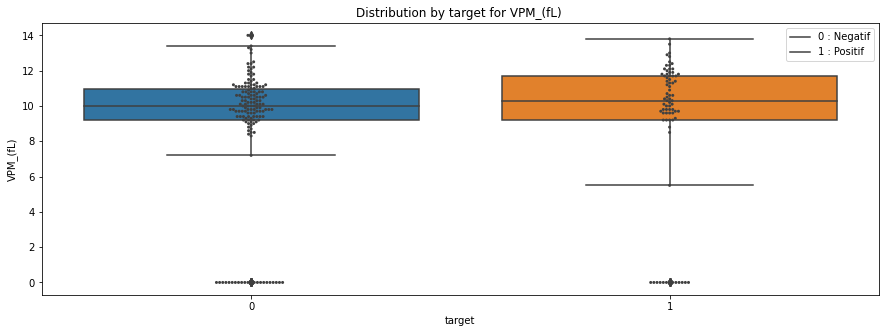

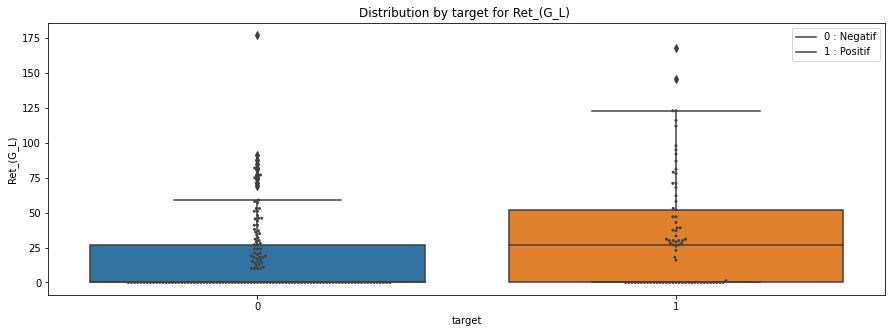

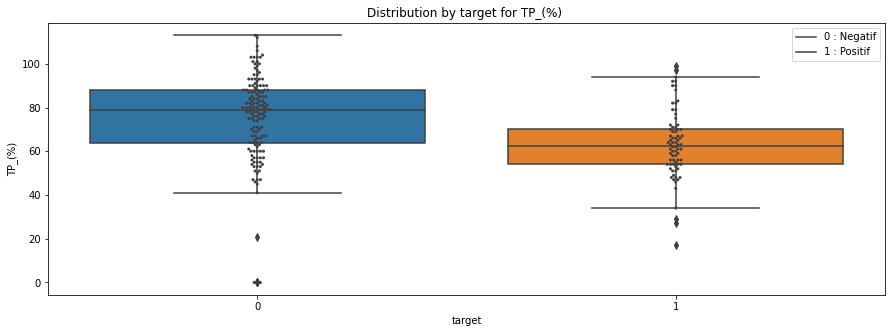

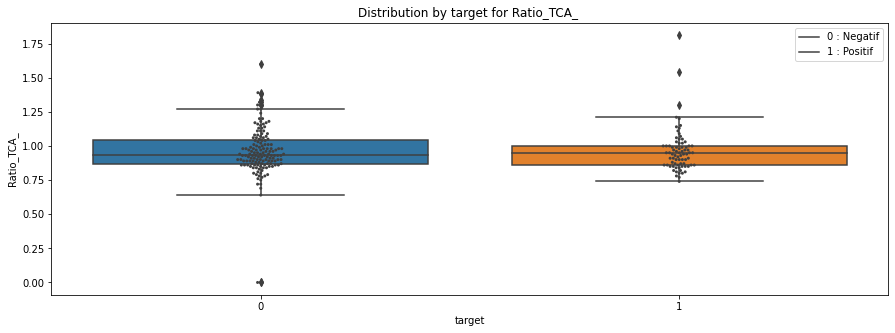

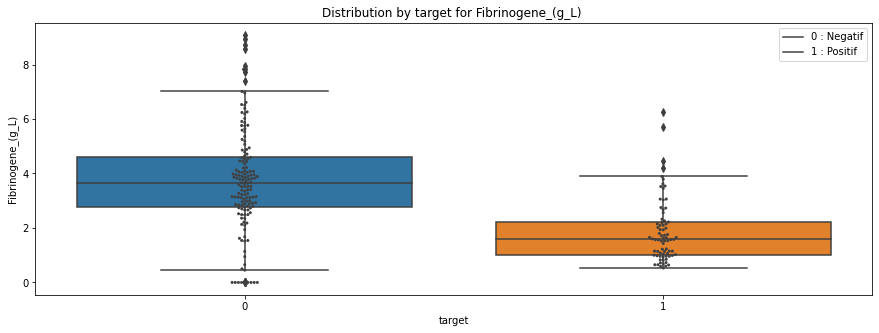

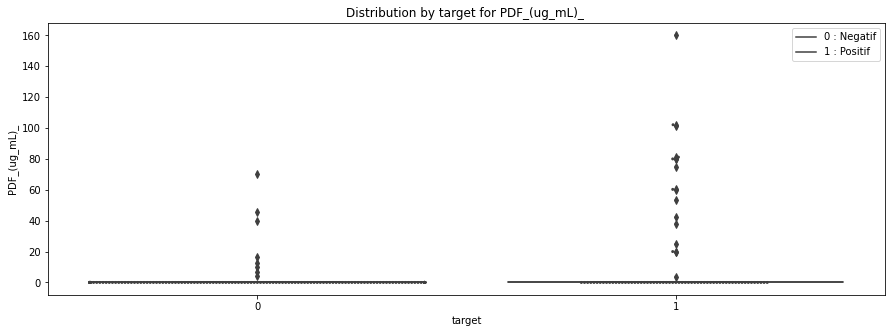

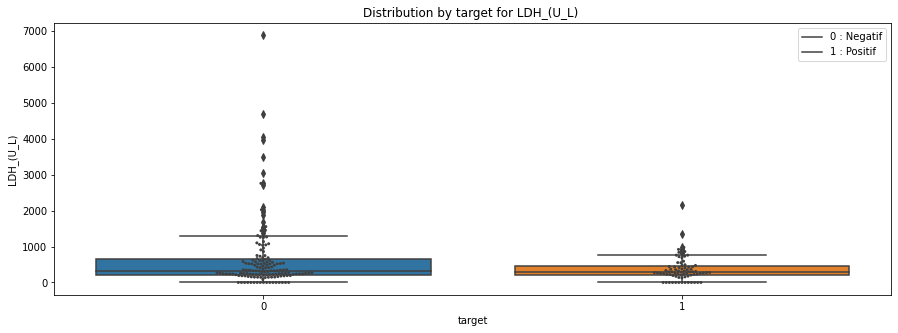

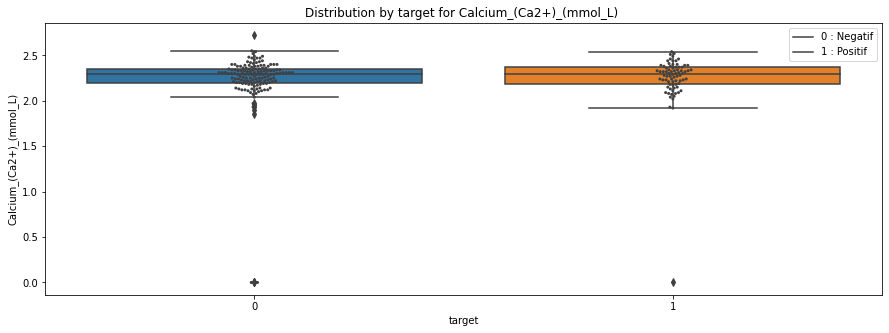

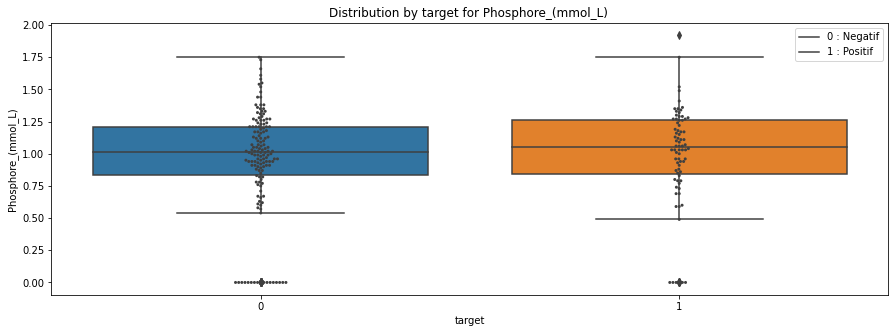

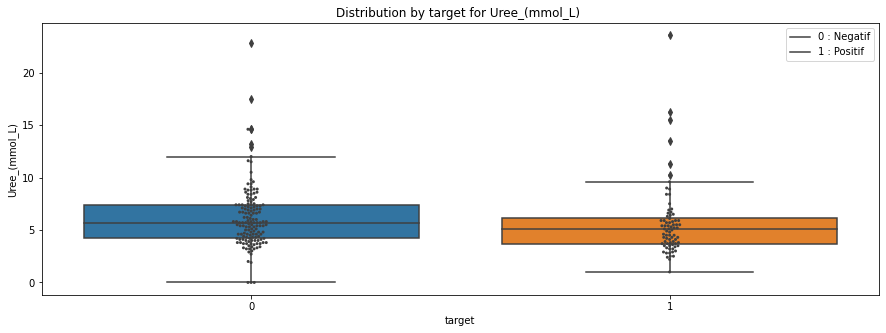

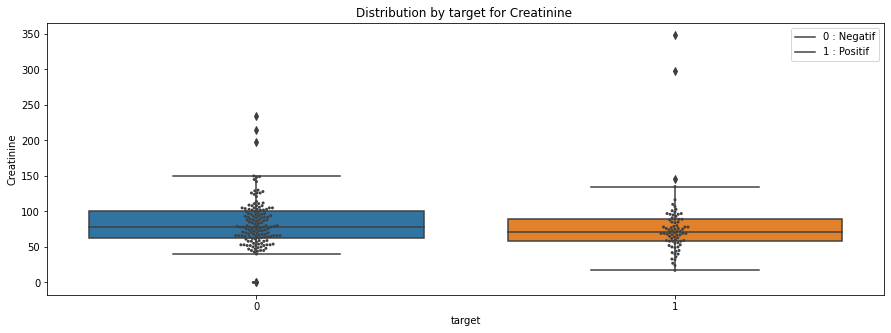

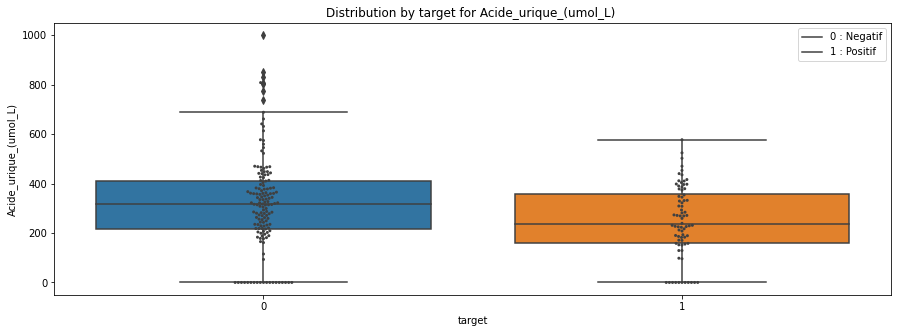

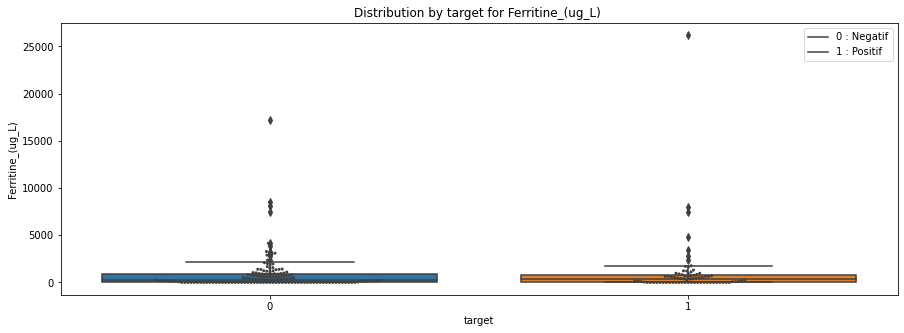

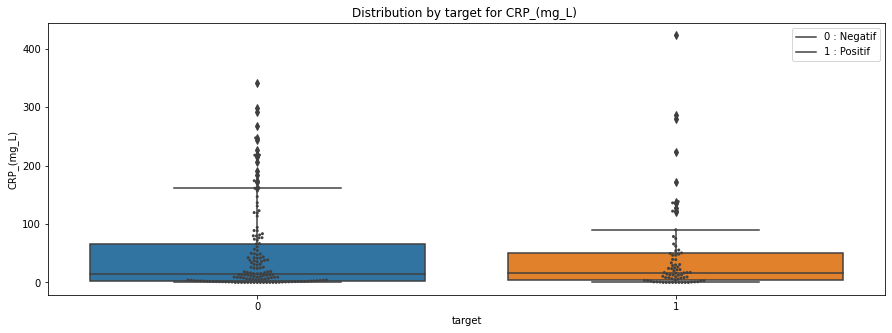

In [29]:
all_var_distribution(df, num_cols_name)

In [30]:
## Je vais utliser la fonction de correlation de pandas afin d'obtenir un score par variable, plus il est proche de 1
## plus la varaible semble être importante pour déterminer si positif ou négatif

corr = df.corr().abs()
corr.target[corr.target >= 0.01].sort_values(ascending=False)

target                     1.000000
Fibrinogene_(g_L)          0.462598
Plq_(G_L)                  0.363714
TP_(%)                     0.298624
Mono_(%)                   0.298432
Age                        0.294756
Lymphos_(G_L)              0.293287
PDF_(ug_mL)_               0.279430
PNN_(G_L)                  0.264183
VGM_(fL)                   0.243452
Ret_(G_L)                  0.232772
Leucocytes_(G_L)           0.205972
Mono_(G_L)                 0.194441
IDR-CV_(%)                 0.191348
Acide_urique_(umol_L)      0.187136
LDH_(U_L)                  0.172294
PNE_(G_L)                  0.166806
Hematocrite_(%)            0.162210
PNE_(%)                    0.125383
PNN_(%)                    0.121676
PNB_(%)                    0.108126
Blastes_(%)                0.093451
TCMH_(pg)                  0.092206
PNB_(G_L)                  0.084104
Hemoglobine_(g_L)          0.079494
Uree_(mmol_L)              0.077959
Creatinine                 0.065723
Sex_M_F_(0_1)              0

# Hypothèse Rapport Variable/Target

Cette premiére étape d'exploration me permet de mettre en place le code de clean des données qui sera dés la prochaine étape factorisé (creation d'une classe). Elle apporte des informations sur les datas que je réutiliserai pour la prochaine étape : modelisation de l'IA.

- Nos classes n'étant pas parfaitement équilibrées il faudra s'assurer de conserver la même proportion de positif/negatif dans nos données de Train/Test

- Je ne supprimerai pas dans un premier temps les colonnes avec beaucoup de NA, le sujet porte sur des prise de sang, remplacer par la valeur médianne les NA semble être l'opération la plus cohérente.

- Certaines variables sont à la fois répesentées en valeur absolue et en % ce qui peut être intéressant pour le preprocessing

- le sexe du sujet n'apporte pas d'information supplémentaire, la colonne ne sera pas utlisée 

- L'age du sujet si on en croit les graphiques et le score de correlation semble avoir une importance, les plus jeunes sont visiblement plus positif, mais on ne conservera pas cette colonne car on peut logiquement penser qu'il s'agit d'une mauvaise information, le panel étant petit, les sujets demandent le test si il y'a problémes, je ne pense pas qu'il soit une bonne idée de faire apprendre cette information à l'IA pour prendre une décision --> hypothése à vérifier.
L'age est un facteur important mais ca depend du type de leucémie voir explication :  "La leucémie aiguë est principalement une maladie du sujet âgé : rare avant 45 ans, la survenue des leucémies aiguës myéloïdes augmente régulièrement avec l'âge à partir de 60 ans. Les leucémies aiguës lymphoïdes sont moins fréquentes et se déclarent surtout chez l'enfant de moins de 15 ans".

- Pour la premiére conclusion je vais me concentrer sur les varaibles avec un score de corrélation > à 0.20 la combinaison de ces variables peuvent aboutir à une logique qui sera detectée par l'IA.

- Fibrinogene_(g_L) Score = 0.462598

Recherche définition :  Le fibrinogène est une protéine contenue dans le plasma sanguin et qui intervient dans la coagulation.

--> la répartition de cette donnée est plus basse chez les positifs que les négatifs, ici aussi l'information retournée par nos datas semble cohérente, la diférence est plutot visible.

- Plq_(G_L) Score = 0.363714

Recherche définition : Les plaquettes sanguines sont de petites cellules dépourvues de noyau qui circulent dans le sang avec les globules rouges et les globules blancs. Elles ont un rôle majeur dans la coagulation sanguine

--> la répartition de cette donnée est plus basse chez les positifs que les négatifs, ici aussi l'information retournée par nos datas semble cohérente, la diférence est plutot visible.

- TP (%) Score = 0.298624

Recherche définition : La mesure du TP explore la voie extrinsèque de la coagulation, notamment les facteurs VII, V, X, II et le fibrinogène (protéine présente dans le plasma sanguin essentielle à la coagulation du sang). Il s'agit d'un test exprimé en secondes ou en pourcentage avec un taux normalement compris entre 70% et 100%.

---> pas de manquant chez les positifs, taux plus bas que chez les négatifs, semble être en adéquation avec la définition qui évoque un taux normal entre 70 et 100.

- Mono (%)  Score = 0.298432

Recherche définition : Les monocytes sont des globules blancs qui détruisent les virus et bactéries. ... Le taux normal de monocytes dans le sang est situé entre 600 et 1000, ils représentent environ 1 à 10 % des globules blancs

--> la répartition de cette donnée est plus basse chez les positifs que les négatifs, ici aussi l'information retournée par nos datas semble cohérente.

- Lymphos (G/L) Score = 0.293287

Recherche définition : Les lymphocytes sont des globules blancs (leucocytes) dont le rôle est la défense immunitaire de l'organisme face aux agressions infectieuses.
Le taux de lymphocytes est bas lorsqu'il est inférieur à 1500/mm3. Ce phénomène appelé "lymphopénie" entraîne un déficit immunitaire et il peut être la conséquence de :maladies touchant le sang comme les leucémies

--> la répartition de cette donnée est plus basse chez les positifs que les négatifs, ici aussi l'information retournée par nos datas semble cohérente.

- PDF_(ug_mL) Score = 0.279430

Recherche définition : pas trouvée :(

--> Cette donnée est la plus absente du dataset et a fait l'objet d'une analyse particuliére dans le notebook

- PNN (G/L) Score =  0.264183

Les PNN sont des cellules issues de précurseurs de la moelle osseuse. Après leur passage dans le sang, 
ils sont dotés de propriétés leur permettant d'attirer certaines particules étrangères (chimiotactisme)
notamment bactériennes. Ils sont en outre capables d'ingérer (phagocytose) et de détruire ces particules étrangères 
grâce à leur nombreuses granulations (lysosomes) riches en diverses enzymes.
Le nombre de PNN est donc augmenté au cours des infections bactériennes.

--> la répartition de cette donnée est plus basse chez les positifs que les négatifs, ici aussi l'information retournée par nos datas semble cohérente.

- VGM (fL) Score = 0.243452

Recherche définition : Le dosage du VGM fait partie du dosage sanguin de la numération formule sanguine, appelée NFS. Le terme "VGM" signifie "Volume Globulaire Moyen" et correspond au volume moyen des globules rouges dans le sang

--> la répartition de cette donnée est plus basse chez les positifs que les négatifs, ici aussi l'information retournée par nos datas semble cohérente.

- Ret_(G_L) Score =  0.232772

Recherche définition : pas trouvée :( 

--> la répartition de cette données est plus élevées chez les positifs que les négatifs, mais on avait 48% de manquants au départ.

- Leucocytes (G/L) Score = 0.205972

Recherche définition : Les leucocytes ou "globules blancs" sont des cellules produites par la moelle osseuse et présentes dans le sang. Ils augmentent en cas d'infection, d'inflammation, d'allergie, d'un dysfonctionnement de la moelle osseuse ou à cause de certains médicaments.

--> la répartition de cette données est plus basse chez les positifs que les négatifs, ici aussi l'information retournée par nos datas semble cohérente.

- Pour terminer, comme on a un nombre assez faible de data, on peut envisager de réduire les dimensions pour faciliter la         modélisation. 
  Les variables qui obtiennent un score > 0.2 :
  2 sont exprimées en % et le reste en valeur absolue

- Fibrinogene_(g_L)          0.462598
- Plq_(G_L)                  0.363714
- TP_(%)                     0.298624
- Mono_(%)                   0.298432
- Lymphos_(G_L)              0.293287
- PDF_(ug_mL)_               0.279430
- PNN_(G_L)                  0.264183
- VGM_(fL)                   0.243452
- Ret_(G_L)                  0.232772
- Leucocytes_(G_L)           0.205972

# --- Fin ---